<a href="https://colab.research.google.com/github/BenegaAriel/Data_Analysis_Practice/blob/main/Dolares_BNA_%26_BLUE_2013_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dolares
*Dolar BNA y Blue desde Enero 2013 hasta Septiembre 2021.*

## Instalar las librerias necesarias.

In [ ]:
pip install SQLAlchemy

In [ ]:
!pip install --upgrade plotly

     |████████████████████████████████| 23.9 MB 12 kB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [ ]:
!pip install -U plotly

In [ ]:
from datetime import date, datetime, timedelta
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import urllib
import requests
import plotly.graph_objects as go
import plotly.express as px
import psycopg2 as pg2
import sys, os
import calplot
from sqlalchemy import create_engine

## Subir archivo con los datos

In [ ]:
from google.colab import files # Cargar el archivo desde la PC.
uploaded = files.upload()

Saving Dolar_BNA_BLUE_2013_2021.xlsx to Dolar_BNA_BLUE_2013_2021.xlsx


## Exploracion de los Datos

In [ ]:
df_cero = pd.read_excel('/content/Dolar_BNA_BLUE_2013_2021.xlsx') # Leer el archivo. 
df_cero.tail(15) # Mostrar las ultimas 15 filas del archivo.

,DATE,BNA_Compra,BNA_Venta,Blue_Compra,Blue_Venta
3165,2021-09-01,97,103,176.5,180.7
3166,2021-09-02,97,103,176.8,181
3167,2021-09-03,97,103,177.8,182
3168,2021-09-04,NaN,NaN,NaN,NaN
3169,2021-09-05,NaN,NaN,NaN,NaN
3170,2021-09-06,97,103,177.8,182
3171,2021-09-07,97,103,179.9,183.5
3172,2021-09-08,97.25,103.25,183.4,187
3173,2021-09-09,97.25,103.25,182.9,186.5
3174,2021-09-10,97.25,103.25,181.4,185


In [ ]:
df_cero.shape # cantidad de Filas x Columnas

(3180, 5)

In [ ]:
df_cero.index # Como es el index

RangeIndex(start=0, stop=3180, step=1)

In [ ]:
for col in df_cero.columns:
    print(col) # Listado con el nombre de cada columna.

#df_cero.columns

DATE
BNA_Compra
BNA_Venta
Blue_Compra
Blue_Venta


In [ ]:
df_cero.info() # Descripcion tipo de datos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3180 entries, 0 to 3179
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DATE         3180 non-null   datetime64[ns]
 1   BNA_Compra   2328 non-null   object        
 2   BNA_Venta    2330 non-null   object        
 3   Blue_Compra  2312 non-null   object        
 4   Blue_Venta   2312 non-null   object        
dtypes: datetime64[ns](1), object(4)
memory usage: 124.3+ KB


## Limpiar los datos.

In [ ]:
# Convertir las columnas object en numero

df_cero['BNA_Compra'] = df_cero['BNA_Compra'].astype(float)
df_cero['BNA_Venta'] = df_cero['BNA_Venta'].astype(float)
df_cero['Blue_Compra'] = df_cero['Blue_Compra'].astype(float)
df_cero['Blue_Venta'] = df_cero['Blue_Venta'].astype(float)
df_cero.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3180 entries, 0 to 3179
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DATE         3180 non-null   datetime64[ns]
 1   BNA_Compra   2328 non-null   float64       
 2   BNA_Venta    2330 non-null   float64       
 3   Blue_Compra  2312 non-null   float64       
 4   Blue_Venta   2312 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 124.3 KB


In [ ]:
# Completar los valores faltantes con el valor anterior porque los faltantes son Sab, Dom y Feriados
df_cero.ffill(inplace=True)
df_cero.tail(15)

,DATE,BNA_Compra,BNA_Venta,Blue_Compra,Blue_Venta
3165,2021-09-01,97,103,176.5,180.7
3166,2021-09-02,97,103,176.8,181
3167,2021-09-03,97,103,177.8,182
3168,2021-09-04,97,103,177.8,182
3169,2021-09-05,97,103,177.8,182
3170,2021-09-06,97,103,177.8,182
3171,2021-09-07,97,103,179.9,183.5
3172,2021-09-08,97.25,103.25,183.4,187
3173,2021-09-09,97.25,103.25,182.9,186.5
3174,2021-09-10,97.25,103.25,181.4,185


In [ ]:
# Crear un indice con la columna 'DATE'

df_uno = df_cero.set_index('DATE')
#all_years_data_ind.head()
df_uno.tail()

,BNA_Compra,BNA_Venta,Blue_Compra,Blue_Venta
DATE,,,,
2021-09-11,97.25,103.25,181.4,185
2021-09-12,97.25,103.25,181.4,185
2021-09-13,97.25,103.25,177.4,181
2021-09-14,97.25,103.25,178.9,182.5
2021-09-15,97.5,103.5,181.4,185


## Graficos

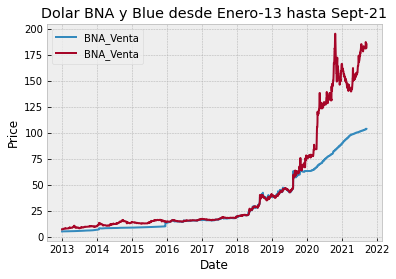

In [ ]:
# Grafico comparativo entre Dolar BNA y Dolar Blue

plt.style.use('bmh')

fig, ax = plt.subplots()  

ax.plot(df_uno.index, df_uno['BNA_Venta'], label='BNA_Venta')  
ax.plot(df_uno.index, df_uno['Blue_Venta'], label='Blue_Venta')  
#ax.plot(df_price.index, df_price['BTC PRICE'], label='BTC')  

ax.set_xlabel('Date')  
ax.set_ylabel('Price')  
ax.set_title('Dolar BNA y Blue desde Enero-13 hasta Sept-21')  
ax.legend()

#ax.set(yscale="log")

plt.show()